Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 27.11it/s]


          sumsquare_error         aic         bic  kl_div  ks_statistic  \
lognorm          0.571232  568.758184 -545.889890     inf      0.043859   
chi2             0.571836  567.911171 -545.776894     inf      0.044926   
gamma            0.571836  567.911161 -545.776894     inf      0.044926   
norm             0.583276  565.159907 -548.330232     inf      0.071489   
rayleigh         0.620450         inf -541.719200     inf      0.125688   

          ks_pvalue  
lognorm    0.980619  
chi2       0.975533  
gamma      0.975533  
norm       0.618862  
rayleigh   0.062253  
{'lognorm': {'s': 0.14616687492159153, 'loc': -7.6842817627528035, 'scale': 17.344412595618948}}
22.058401026893478


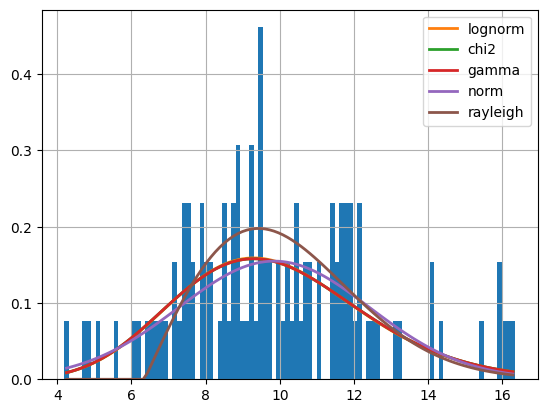

In [6]:
import numpy as np
import pandas as pd
from fitter import Fitter, get_common_distributions
import scipy.stats as stats

# Fitter python package was used to find the best fitting distribution in terms of the RSS error of potential fits (lognormal found to be best)
# In practice, recent retrievals would be compared to the distribution and filtered based on a set threshold
# of 99th percentile to identify them as outliers. From this, further analysis would be done using the downscaling model, MODIS verification and finally
# thresholding at 99th percentile of the pixel values to identify the most thermally active regions of the region of interest. If these lie within 
# bounding areas/ key building interest, it's importance would be flagged accordingly.

path = "C:/Users/reece/OneDrive - University of Bristol/RP3/Code/Thermal/final/landsattabledata.xlsx"
df = pd.read_excel(path)
df = df['diff_from_mean'].values


f = Fitter(df,
           distributions= get_common_distributions())
f.fit()
print(f.summary())
best = f.get_best(method = 'sumsquare_error')
best_vals = list(best.values())[0]
print(best)
percentile_value = stats.lognorm.ppf(0.99, s=best_vals['s'], scale=best_vals['scale'])
print(percentile_value)
